<a href="https://colab.research.google.com/github/namrata-gautam/Medical_cost_price_prediction/blob/main/Medical_cost_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies.

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

Data Collection and Analysis


In [91]:
#Loading the Dataset from csv file to Pandas DataFrame
df=pd.read_csv("/content/insurance (1).csv")

In [92]:
#Printing first 5 rows of a dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [93]:
df1=df.copy()

In [94]:
#Number of rows and columns in this dataset
df1.shape

(1338, 7)

In [95]:
df1.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [96]:
#Finding Null values
df1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [97]:
#Getting information about the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Data analysis



In [98]:
#Getting the statisical measures of the data
df1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-99-d0b09c32bee3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['age'])


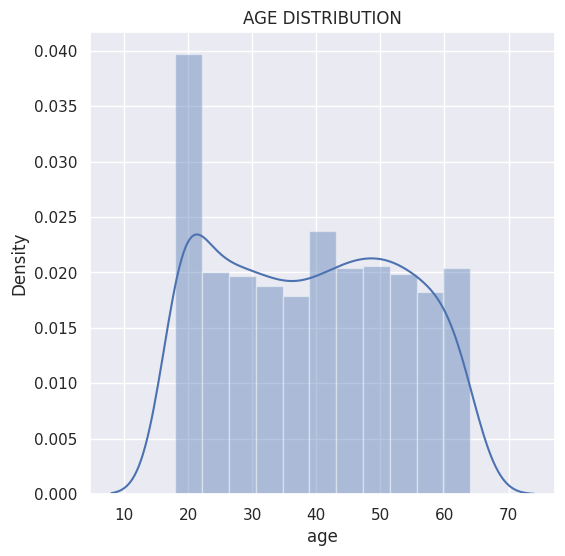

In [99]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df1['age'])
plt.title("AGE DISTRIBUTION")
plt.show()

In [100]:
df1['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

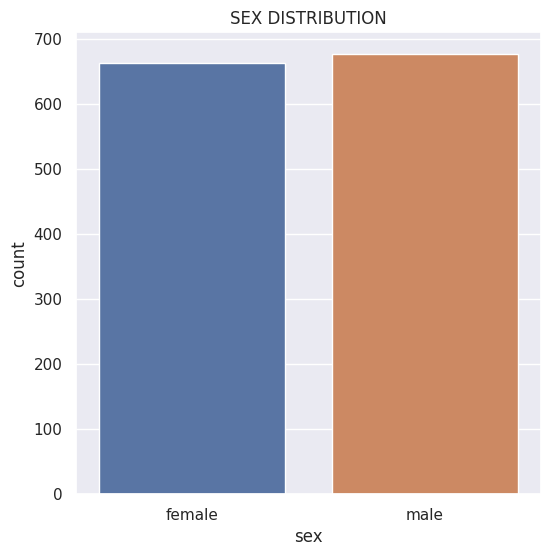

In [101]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df1)
plt.title("SEX DISTRIBUTION")
plt.show()

In [102]:
df1['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-103-1c9f65b0b242>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['bmi'])


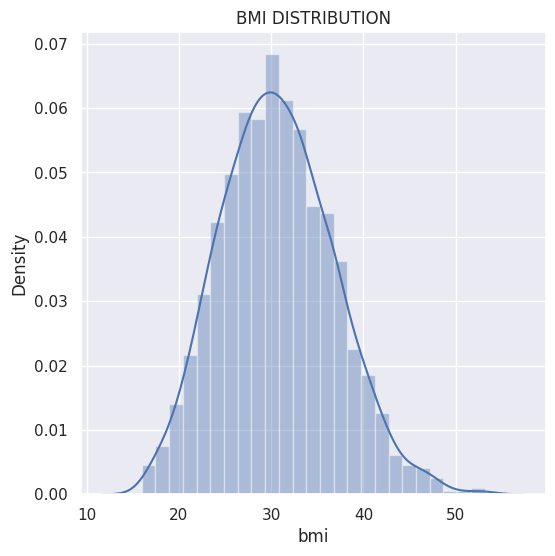

In [103]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df1['bmi'])
plt.title("BMI DISTRIBUTION")
plt.show()

In [104]:
df1['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

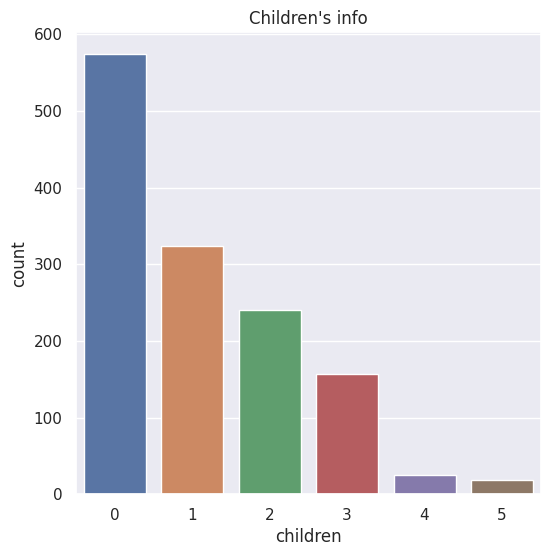

In [105]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df1)
plt.title("Children's info")
plt.show()

In [106]:
df1['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

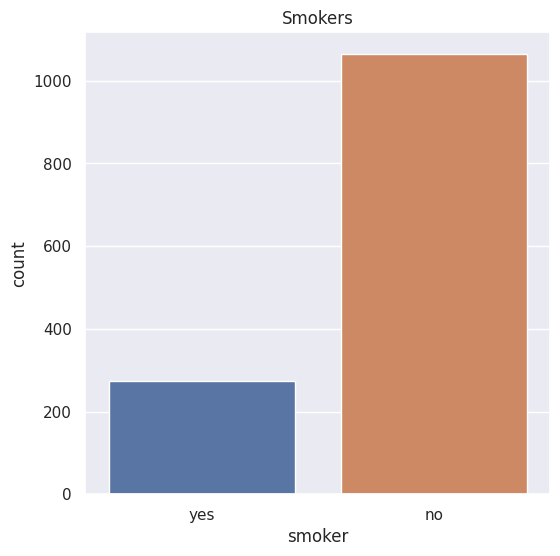

In [107]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df1)
plt.title("Smokers")
plt.show()

In [108]:
df1['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

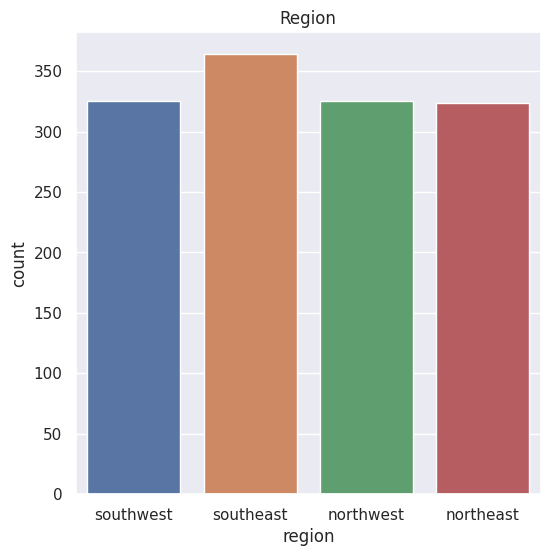

In [109]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df1)
plt.title("Region")
plt.show()

In [110]:
df1['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-111-912b764eeddc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['charges'])


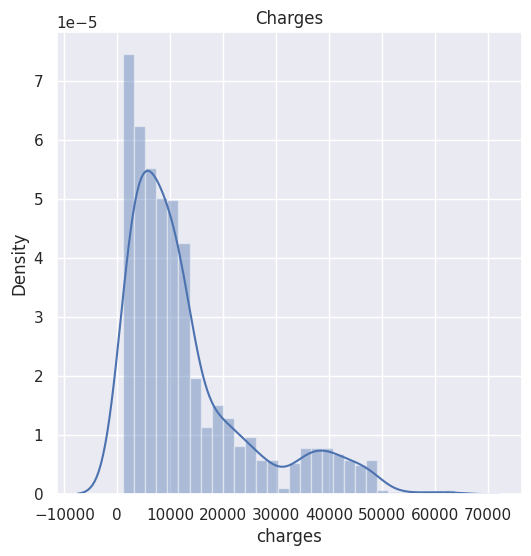

In [111]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df1['charges'])
plt.title("Charges")
plt.show()

DATA PREPROCESSING


In [112]:
df1['sex']=df1['sex'].map({'female':1 ,'male':0})
df1['smoker']=df1['smoker'].map({'yes':1 ,'no':0})

In [113]:
dfr=pd.get_dummies(df['region'])
dfr.head()


,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [143]:
df2 = pd.concat((df1,dfr),axis='columns')
df2.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,0,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,0,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,0,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,0,28.880,0,0,northwest,3866.85520,0,1,0,0


In [144]:
X=df2.drop(columns= ['charges','region'],axis=1)
y=df2['charges']
print(X)
print(y)

      age  sex     bmi  children  smoker  northeast  northwest  southeast  \
0      19    1  27.900         0       1          0          0          0   
1      18    0  33.770         1       0          0          0          1   
2      28    0  33.000         3       0          0          0          1   
3      33    0  22.705         0       0          0          1          0   
4      32    0  28.880         0       0          0          1          0   
...   ...  ...     ...       ...     ...        ...        ...        ...   
1333   50    0  30.970         3       0          0          1          0   
1334   18    1  31.920         0       0          1          0          0   
1335   18    1  36.850         0       0          0          0          1   
1336   21    1  25.800         0       0          0          0          0   
1337   61    1  29.070         0       1          0          1          0   

      southwest  
0             1  
1             0  
2             0  
3  

In [145]:
df2.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,0,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,0,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,0,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,0,28.880,0,0,northwest,3866.85520,0,1,0,0


Splitting Train and Test splitting


In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [131]:
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(1003, 9) (335, 9) (1003,) (335,)


LINEAR REGRESSION


In [133]:
#importing the linear regression model
from sklearn.linear_model import LinearRegression

In [135]:
#loading the linear regression model
reg = LinearRegression()

In [139]:
reg.fit(X_train,y_train)

LinearRegression()

In [140]:
reg.score(X_train, y_train)

0.7449555328228536

MODEL EVALUATION


In [ ]:
#Prediction on training model
X_train_predict=reg.predict(X_train)
X_train_predict

In [126]:
#R2 squared value
r2_train = metrics.r2_score(y_train, X_train_predict)
r2_train

0.7449555328228536

In [129]:
#Prediction on testing model
X_test_predict=reg.predict(X_test)
X_test_predict

In [142]:
r2_train = metrics.r2_score(y_test, X_test_predict)
r2_train

0.7672642952734358

BUILDING A PREDICTIVE MODEL

In [150]:
input_data= (30,1,32.4,1,0,0,0,0,1)

#changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = reg.predict(input_data_reshaped)
print("The insurance cost is USD", prediction[0])


The insurance cost is USD 6226.175975069444


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [151]:
input_data= (34,1,31.92,1,1,1,0,0,0)

#changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = reg.predict(input_data_reshaped)
print("The insurance cost is USD", prediction[0])


The insurance cost is USD 31592.229795045507


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
